## Steps performed on case study

In [29]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [30]:
# import required libraries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

## Loading the data set

In [31]:
# read data
churn = pd.read_csv("telecom_churn_data.csv")

In [32]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [33]:
churn.shape

(99999, 226)

In [34]:
churn.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

As observed, there are 99999 rows and 226 columns in the dataset.

In [35]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [36]:
#Differentiating columns based upon type
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

print('Number of ID columns: {0}'.format(len(id_cols)))
print('Number of Date columns: {0}'.format(len(date_cols)))
print('Number of Category columns: {0}'.format(len(cat_cols)))
print('Number of Numercical columns: {0}'.format(len(num_cols)))
print('Total columns in dataset: {0}'.format(churn.shape[1]))

Number of ID columns: 2
Number of Date columns: 12
Number of Category columns: 8
Number of Numercical columns: 204
Total columns in dataset: 226


## Missing values inspection

In [37]:
#Percentage of missing values column-wise
round(churn.isnull().sum()*100/churn.shape[0], 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Imputing null values

In [38]:
#Recharge related columns
recharge_cols = ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9',
                 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
                 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
                 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
                 ]

churn[recharge_cols].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,63.156252,59.385804,62.641716,43.901249
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,97.356649,95.915385,104.431816,90.809712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,30.000000,30.000000,30.000000,0.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,110.000000,110.000000,130.000000,50.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,4010.000000,4010.000000,4449.000000,3399.000000


In [39]:
churn[recharge_cols].isnull().sum()

total_rech_num_6          0
total_rech_num_7          0
total_rech_num_8          0
total_rech_num_9          0
total_rech_amt_6          0
total_rech_amt_7          0
total_rech_amt_8          0
total_rech_amt_9          0
max_rech_amt_6            0
max_rech_amt_7            0
max_rech_amt_8            0
max_rech_amt_9            0
date_of_last_rech_6    1607
date_of_last_rech_7    1767
date_of_last_rech_8    3622
date_of_last_rech_9    4760
last_day_rch_amt_6        0
last_day_rch_amt_7        0
last_day_rch_amt_8        0
last_day_rch_amt_9        0
dtype: int64

In [40]:
# Getting the recharge amount for which recharge date is not present
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_6.isnull(), 
                         ['total_rech_num_6', 'date_of_last_rech_6']].count()

total_rech_num_6       1607
date_of_last_rech_6       0
dtype: int64

In [41]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_7.isnull(), 
                         ['total_rech_num_7', 'date_of_last_rech_7']].count()

total_rech_num_7       1767
date_of_last_rech_7       0
dtype: int64

In [42]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_8.isnull(), 
                         ['total_rech_num_8', 'date_of_last_rech_8']].count()

total_rech_num_8       3622
date_of_last_rech_8       0
dtype: int64

In [43]:
churn[recharge_cols].loc[churn[recharge_cols].date_of_last_rech_9.isnull(), 
                         ['total_rech_num_9', 'date_of_last_rech_9']].count()

total_rech_num_9       4760
date_of_last_rech_9       0
dtype: int64

#### As observed, recharge value is 0 for when the recharge date is not present. So this is a meaningful missing, we leave it as it is since we will drop the recharge dates later

## Analysing data recharge features

In [44]:
#We observed that the recharge data columns have around 74% null values, but we need this feature to later 
#filter out high value customers. Hence, replacing the null values with 0.0

churn['total_rech_data_6'] = churn['total_rech_data_6'].replace(np.NaN,0.0)

churn['total_rech_data_7'] = churn['total_rech_data_7'].replace(np.NaN,0.0)

churn['total_rech_data_8'] = churn['total_rech_data_8'].replace(np.NaN,0.0)

churn['av_rech_amt_data_6'] = churn['av_rech_amt_data_6'].replace(np.NaN,0.0)

churn['av_rech_amt_data_7'] = churn['av_rech_amt_data_7'].replace(np.NaN,0.0)

churn['av_rech_amt_data_8'] = churn['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [45]:
#adding new column total recharge amount for data: total_rech_amt_data for filtering High Value customer later

churn['total_rech_amt_data_6'] = churn.av_rech_amt_data_6 * churn.total_rech_data_6

churn['total_rech_amt_data_7'] = churn.av_rech_amt_data_7 * churn.total_rech_data_7

churn['total_rech_amt_data_8'] = churn.av_rech_amt_data_8 * churn.total_rech_data_8

In [46]:
#We can drop the avg recharge amount and total recharge amount columns
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
churn.drop(cols_to_drop, axis = 1, inplace = True)

### Replacing NaN in categorical columns

In [47]:
# replacing Nan in categorical columns with new category '-1'
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna('-1'))

In [48]:
round(churn[cat_cols].isnull().sum() * 100 / churn.shape[0], 2)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

### Dropping columns with high percentage of missing

In [49]:
#dropping columns with more than 50% missing values
MISSING_THRESHOLD = 0.5
include_cols = list(churn.apply(lambda column: True if column.isnull().sum()/churn.shape[0] < MISSING_THRESHOLD else False))
churn = churn.loc[:, include_cols]
churn.shape

(99999, 197)

In [50]:
include_cols.count(False)

26

### Dropping ID and Date columns

In [51]:
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9'
            ]
churn = churn.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", churn.shape)

Shape after dropping:  (99999, 187)


### Imputing using IterativeImputer

In [52]:
dropped_cols = ['max_rech_data_9', 'count_rech_2g_6', 'max_rech_data_6', 'av_rech_amt_data_7', 'count_rech_3g_7', 
                'arpu_3g_9', 'total_rech_data_8', 'arpu_2g_9', 'arpu_2g_8', 'count_rech_3g_8', 'count_rech_3g_9', 
                'total_rech_data_6', 'arpu_3g_8', 'max_rech_data_8', 'arpu_3g_6', 'count_rech_2g_8', 'arpu_2g_6', 
                'max_rech_data_7', 'total_rech_data_7', 'arpu_2g_7', 'total_rech_data_9', 'count_rech_2g_7', 
                'av_rech_amt_data_9', 'av_rech_amt_data_6', 'arpu_3g_7', 'count_rech_2g_9', 'av_rech_amt_data_8', 
                'count_rech_3g_6']
num_cols = [x for x in num_cols if x not in dropped_cols]
churn[num_cols].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.0,0.0,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,9,11,5,74,384,283,121,4

In [53]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [54]:
churn_cols = churn.columns
imputer = IterativeImputer(max_iter = 2, random_state = 10)
df_stg = churn.copy()
churn_imputed = imputer.fit_transform(df_stg)

In [55]:
# convert imputed numpy array to pandas dataframe
churn_filtered = pd.DataFrame(churn_imputed, columns=churn_cols)
print(churn_filtered.isnull().sum()*100/churn_filtered.shape[0])

loc_og_t2o_mou           0.0
std_og_t2o_mou           0.0
loc_ic_t2o_mou           0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
onnet_mou_9              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
offnet_mou_9             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_ic_mou_9            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
roam_og_mou_9            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2t_mou_9         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2m_mou_9         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2f_mou

In [56]:
temp = churn_filtered.copy()

In [152]:
churn_filtered = temp.copy()

## High-value customers

In [153]:
churn_filtered.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 187 columns):
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
onnet_mou_9              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
offnet_mou_9             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_ic_mou_9            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
roam_og_mou_9            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2t_mou_9         float64

In [154]:
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-115.413456,-69.438044,0.00,-116.707886,172.552412,149.024516,0.00,148.193771,43.866346,27.174658,0.00,27.771829,15.25543,0.338317,0.00,-2.895181,-64.907084,-81.610558,0.00,-88.017458,93.309287,91.37702,0.00,90.395155,3.780231,3.806711,0.00,3.703538,2.035007,-5.117969,0.00,-0.802791,4.682068,-16.08022,0.00,-17.364149,44.371407,45.583016,0.00,45.230421,87.120501,90.59602,0.00,86.330537,1.19604,1.194964,0.00,1.08196,0.0,0.0,0.0,0.0,121.377038,126.689008,0.00,123.568934,-114.734338,-104.393803,0.0,-94.747758,3.911622,4.973771,0.00,4.404337,0.444302,0.047124,0.0,0.049352,0.00,0.00,0.00,0.00,-43.80862,-50.572336,0.16,-45.920553,107.484858,107.11719,4.13,106.1737,12.073372,12.592415,1.15,12.163981,62.957863,57.729188,5.44,61.64361,-18.463198,-19.424842,0.00,-18.586838,20.715317,21.653099,0.00,19.617493,2.162352,2.22028,0.00,2.175456,0.0,0.0,0.0,0.0,0.433217,1.140493,0.00,0.108694,0.00,0.00,5.44,0.00,-67.043578,-64.313245,0.0,-66.83736,7.805556,8.134599,0.0,8.08457,0.854149,1.011275,0.0,1.017639,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.

In [155]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn_filtered['avg_rech_amt_6_7'] = (churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_data_6
                                    + churn_filtered.total_rech_amt_7 + churn_filtered.total_rech_amt_data_7) / 2
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,avg_rech_amt_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-115.413456,-69.438044,0.00,-116.707886,172.552412,149.024516,0.00,148.193771,43.866346,27.174658,0.00,27.771829,15.25543,0.338317,0.00,-2.895181,-64.907084,-81.610558,0.00,-88.017458,93.309287,91.37702,0.00,90.395155,3.780231,3.806711,0.00,3.703538,2.035007,-5.117969,0.00,-0.802791,4.682068,-16.08022,0.00,-17.364149,44.371407,45.583016,0.00,45.230421,87.120501,90.59602,0.00,86.330537,1.19604,1.194964,0.00,1.08196,0.0,0.0,0.0,0.0,121.377038,126.689008,0.00,123.568934,-114.734338,-104.393803,0.0,-94.747758,3.911622,4.973771,0.00,4.404337,0.444302,0.047124,0.0,0.049352,0.00,0.00,0.00,0.00,-43.80862,-50.572336,0.16,-45.920553,107.484858,107.11719,4.13,106.1737,12.073372,12.592415,1.15,12.163981,62.957863,57.729188,5.44,61.64361,-18.463198,-19.424842,0.00,-18.586838,20.715317,21.653099,0.00,19.617493,2.162352,2.22028,0.00,2.175456,0.0,0.0,0.0,0.0,0.433217,1.140493,0.00,0.108694,0.00,0.00,5.44,0.00,-67.043578,-64.313245,0.0,-66.83736,7.805556,8.134599,0.0,8.08457,0.854149,1.011275,0.0,1.017639,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.

In [156]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn_filtered.avg_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [157]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn_filtered.loc[churn_filtered.avg_rech_amt_6_7 > churn_filtered.avg_rech_amt_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape

(29953, 188)

In [158]:
churn_filtered = churn_filtered.drop('avg_rech_amt_6_7', axis = 1)
churn_filtered.shape

(29953, 187)

#### As observed, after filteration, we are left with 29953 rows and 187 columns

## Deriving churn value

In [159]:
#Calculate total incoming and outgoing minutes of usage
churn_filtered['total_calls_mou_9'] = churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [160]:
#Calculate 2g and 3g data consumption
churn_filtered['total_internet_mb_9'] =  churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9

In [161]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned
# 0 - not churn, 1 - churn
churn_filtered['churn'] = churn_filtered.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)
churn_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_calls_mou_9,total_internet_mb_9,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-115.413456,-69.438044,0.00,-116.707886,172.552412,149.024516,0.00,148.193771,43.866346,27.174658,0.00,27.771829,15.25543,0.338317,0.00,-2.895181,-64.907084,-81.610558,0.00,-88.017458,93.309287,91.37702,0.00,90.395155,3.780231,3.806711,0.00,3.703538,2.035007,-5.117969,0.00,-0.802791,4.682068,-16.08022,0.00,-17.364149,44.371407,45.583016,0.00,45.230421,87.120501,90.59602,0.00,86.330537,1.19604,1.194964,0.00,1.081960,0.0,0.0,0.0,0.0,121.377038,126.689008,0.00,123.568934,-114.734338,-104.393803,0.00,-94.747758,3.911622,4.973771,0.00,4.404337,0.444302,0.047124,0.0,0.049352,0.00,0.00,0.00,0.00,-43.80862,-50.572336,0.16,-45.920553,107.484858,107.11719,4.13,106.173700,12.073372,12.592415,1.15,12.163981,62.957863,57.729188,5.44,61.643610,-18.463198,-19.424842,0.00,-18.586838,20.715317,21.653099,0.00,19.617493,2.162352,2.22028,0.00,2.175456,0.0,0.0,0.0,0.0,0.433217,1.140493,0.00,0.108694,0.00,0.00,5.44,0.00,-67.043578,-64.313245,0.0,-66.837360,7.805556,8.134599,0.00,8.084570,0.854149,1.011275,0.00,1.017639,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [162]:
# delete derived variables
churn_filtered = churn_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [163]:
# print churn ratio
print('Churn class')
print(churn_filtered.churn.value_counts()*100/churn_filtered.shape[0])

Churn class
0    91.877274
1     8.122726
Name: churn, dtype: float64


#### As observed, there is high class imbalance in churning. There is a 91:9 ratio

## Delete columns that are related to 9th month

In [164]:
# delete all features relating to 9th month
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(29953, 144)

## Updating the categorical and numerical columns

In [165]:
# extract all names that end with 9
col_9_names = churn.filter(regex='9$', axis=1).columns
print(col_9_names)

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')


In [166]:
# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

print('Categorical columns: ' , len(cat_cols))
print(cat_cols)
print()
print('Numerical columns: ' , len(num_cols))
print(num_cols)

Categorical columns:  6
['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

Numerical columns:  138
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou

In [167]:
# change columns types
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [168]:
churn_filtered.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29953 entries, 0 to 29952
Data columns (total 144 columns):
loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64

## New variables derivation

Since 8th month is the deciding month for the customer whether he will churn or not, let's try to find some differences between recharge and daat usage by the customer. We will calculate difference in behavior for all different types of column

In [169]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered['onnet_mou_diff'] = churn_filtered.onnet_mou_8 - ((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered['offnet_mou_diff'] = churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered['roam_ic_mou_diff'] = churn_filtered.roam_ic_mou_8 - ((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered['roam_og_mou_diff'] = churn_filtered.roam_og_mou_8 - ((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_og_t2t_mou_diff'] = churn_filtered.loc_og_t2t_mou_8 - ((churn_filtered.loc_og_t2t_mou_6 + churn_filtered.loc_og_t2t_mou_6)/2)

churn_filtered['loc_og_t2m_mou_diff'] = churn_filtered.loc_og_t2m_mou_8 - ((churn_filtered.loc_og_t2m_mou_6 + churn_filtered.loc_og_t2m_mou_6)/2)

churn_filtered['loc_og_t2f_mou_diff'] = churn_filtered.loc_og_t2f_mou_8 - ((churn_filtered.loc_og_t2f_mou_6 + churn_filtered.loc_og_t2f_mou_6)/2)

churn_filtered['loc_og_t2c_mou_diff'] = churn_filtered.loc_og_t2c_mou_8 - ((churn_filtered.loc_og_t2c_mou_6 + churn_filtered.loc_og_t2c_mou_6)/2)

churn_filtered['loc_og_mou_diff'] = churn_filtered.loc_og_mou_8 - ((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered['std_og_t2t_mou_diff'] = churn_filtered.std_og_t2t_mou_8 - ((churn_filtered.std_og_t2t_mou_6 + churn_filtered.std_og_t2t_mou_7)/2)

churn_filtered['std_og_t2m_mou_diff'] = churn_filtered.std_og_t2m_mou_8 - ((churn_filtered.std_og_t2m_mou_6 + churn_filtered.std_og_t2m_mou_7)/2)

churn_filtered['std_og_t2f_mou_diff'] = churn_filtered.std_og_t2f_mou_8 - ((churn_filtered.std_og_t2f_mou_6 + churn_filtered.std_og_t2f_mou_7)/2)

churn_filtered['std_og_t2c_mou_diff'] = churn_filtered.std_og_t2c_mou_8 - ((churn_filtered.std_og_t2c_mou_6 + churn_filtered.std_og_t2c_mou_7)/2)

churn_filtered['std_og_mou_diff'] = churn_filtered.std_og_mou_8 - ((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered['isd_og_mou_diff'] = churn_filtered.isd_og_mou_8 - ((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered['spl_og_mou_diff'] = churn_filtered.spl_og_mou_8 - ((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered['og_others_diff'] = churn_filtered.og_others_8 - ((churn_filtered.og_others_6 + churn_filtered.og_others_8)/2)

churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered['loc_ic_t2t_mou_diff'] = churn_filtered.loc_ic_t2t_mou_8 - ((churn_filtered.loc_ic_t2t_mou_6 + churn_filtered.loc_ic_t2t_mou_7)/2)

churn_filtered['loc_ic_t2m_mou_diff'] = churn_filtered.loc_ic_t2m_mou_8 - ((churn_filtered.loc_ic_t2m_mou_6 + churn_filtered.loc_ic_t2m_mou_7)/2)

churn_filtered['loc_ic_t2f_mou_diff'] = churn_filtered.loc_ic_t2f_mou_8 - ((churn_filtered.loc_ic_t2f_mou_6 + churn_filtered.loc_ic_t2f_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered['std_ic_t2t_mou_diff'] = churn_filtered.std_ic_t2t_mou_8 - ((churn_filtered.std_ic_t2t_mou_6 + churn_filtered.std_ic_t2t_mou_7)/2)

churn_filtered['std_ic_t2m_mou_diff'] = churn_filtered.std_ic_t2m_mou_8 - ((churn_filtered.std_ic_t2m_mou_6 + churn_filtered.std_ic_t2m_mou_7)/2)

churn_filtered['std_ic_t2f_mou_diff'] = churn_filtered.std_ic_t2f_mou_8 - ((churn_filtered.std_ic_t2f_mou_6 + churn_filtered.std_ic_t2f_mou_7)/2)

churn_filtered['std_ic_t2o_mou_diff'] = churn_filtered.std_ic_t2o_mou_8 - ((churn_filtered.std_ic_t2o_mou_6 + churn_filtered.std_ic_t2o_mou_7)/2)

churn_filtered['std_ic_mou_diff'] = churn_filtered.std_ic_mou_8 - ((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered['spl_ic_mou_diff'] = churn_filtered.spl_ic_mou_8 - ((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)

churn_filtered['isd_ic_mou_diff'] = churn_filtered.isd_ic_mou_8 - ((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered['ic_others_diff'] = churn_filtered.ic_others_8 - ((churn_filtered.ic_others_6 + churn_filtered.ic_others_7)/2)

churn_filtered['total_rech_num_diff'] = churn_filtered.total_rech_num_8 - ((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered['max_rech_amt_diff'] = churn_filtered.max_rech_amt_8 - ((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered['last_day_rch_amt_diff'] = churn_filtered.last_day_rch_amt_8 - ((churn_filtered.last_day_rch_amt_6 + churn_filtered.last_day_rch_amt_7)/2)

churn_filtered['vol_2g_mb_diff'] = churn_filtered.vol_2g_mb_8 - ((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered['vol_3g_mb_diff'] = churn_filtered.vol_3g_mb_8 - ((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)

churn_filtered['monthly_2g_diff'] = churn_filtered.monthly_2g_8 - ((churn_filtered.monthly_2g_6 + churn_filtered.monthly_2g_7)/2)

churn_filtered['sachet_2g_diff'] = churn_filtered.sachet_2g_8 - ((churn_filtered.sachet_2g_6 + churn_filtered.sachet_2g_7)/2)

churn_filtered['monthly_3g_diff'] = churn_filtered.monthly_3g_8 - ((churn_filtered.monthly_3g_6 + churn_filtered.monthly_3g_7)/2)

churn_filtered['sachet_3g_diff'] = churn_filtered.sachet_3g_8 - ((churn_filtered.sachet_3g_6 + churn_filtered.sachet_3g_6)/2)

churn_filtered['total_rech_amt_data_diff'] = churn_filtered.total_rech_amt_data_8 - ((churn_filtered.total_rech_amt_data_6 + churn_filtered.total_rech_amt_data_7)/2)


In [170]:
churn_filtered.shape

(29953, 187)

## Remove columns with no variance

In [172]:
for col in churn_filtered.columns:
    if churn_filtered[col].nunique() == 1:
        print("Column", col ,"has no variance and contains only ", churn_filtered[col].nunique()," unique value")
        print("Dropping the column", col)
        print()
        churn_filtered.drop(col, axis = 1, inplace = True)

print("Shape of the updated dataset:", churn_filtered.shape)

Column loc_og_t2o_mou has no variance and contains only  1  unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only  1  unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only  1  unique value
Dropping the column loc_ic_t2o_mou

Column std_og_t2c_mou_6 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_7

Column std_og_t2c_mou_8 has no variance and contains only  1  unique value
Dropping the column std_og_t2c_mou_8

Column std_ic_t2o_mou_6 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mou_6

Column std_ic_t2o_mou_7 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mou_7

Column std_ic_t2o_mou_8 has no variance and contains only  1  unique value
Dropping the column std_ic_t2o_mo

## Remove highly correlated columns

In [174]:
#Selecting columns which have absolute correlation greater than 60%
# Create correlation matrix
corr_matrix = churn_filtered.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

# Drop features 
churn_filtered.drop(to_drop, axis = 1, inplace = True)

In [123]:
churn_filtered.shape

(29953, 80)

## Updating the category and numerical columns

In [176]:
cat_cols = churn_filtered.select_dtypes('category').columns
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

### dropping highly skewed columns

In [177]:
skewnessThreshold = 80
def RemoveSkewedColumn(col, type):
    if col == 'churn':
        return
    count_dict = (round(churn_filtered[col].value_counts(normalize = True) * 100, 2)).to_dict()
    IsSkewed = list(map(lambda x: x >= 80, count_dict.values()))
    if IsSkewed.count(True) > 0:
        print(col, "Skewness:")
        #print(count_dict)
        churn_filtered.drop(col, axis = 1, inplace = True)
        print('Due to high skewness, this column was dropped')
        print()
    else:
        if type == 'category':
            #change type of column to category
            churn_filtered[col] = churn_filtered[col].astype('category')

In [178]:
for col in num_cols:
    RemoveSkewedColumn(col, 'numeric')

roam_ic_mou_7 Skewness:
Due to high skewness, this column was dropped

roam_og_mou_7 Skewness:
Due to high skewness, this column was dropped

std_og_t2f_mou_6 Skewness:
Due to high skewness, this column was dropped

isd_og_mou_6 Skewness:
Due to high skewness, this column was dropped

og_others_7 Skewness:
Due to high skewness, this column was dropped

og_others_8 Skewness:
Due to high skewness, this column was dropped

spl_ic_mou_7 Skewness:
Due to high skewness, this column was dropped

spl_ic_mou_8 Skewness:
Due to high skewness, this column was dropped

monthly_2g_6 Skewness:
Due to high skewness, this column was dropped

monthly_2g_7 Skewness:
Due to high skewness, this column was dropped

monthly_2g_8 Skewness:
Due to high skewness, this column was dropped

sachet_3g_6 Skewness:
Due to high skewness, this column was dropped

sep_vbc_3g Skewness:
Due to high skewness, this column was dropped

monthly_2g_diff Skewness:
Due to high skewness, this column was dropped

sachet_3g_diff S

In [179]:
cat_cols = churn_filtered.select_dtypes('category').columns
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

In [180]:
churn_filtered.shape

(29953, 65)

In [181]:
churn_filtered.head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,night_pck_user_6,night_pck_user_7,night_pck_user_8,sachet_2g_6,fb_user_6,fb_user_7,fb_user_8,aon,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,spl_og_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,sachet_2g_diff,monthly_3g_diff
0,197.385,-115.413456,172.552412,43.866346,-64.907084,93.309287,3.780231,2.035007,-5.117969,0.00,3.911622,4.973771,0.00,0.444302,-43.80862,107.484858,12.073372,-18.463198,20.715317,2.162352,-67.043578,7.805556,0.854149,4.0,252.0,252.0,252.0,30.13,83.57,0.0,0.0,0.0,0.0,1.0,1.0,1.0,968.0,252.0,252.0,252.0,1,7.7025,92.42575,-160.788464,-35.520502,-7.796874,64.907084,-93.309287,-3.780231,-1.195502,-4.442697,47.350478,-103.171024,-11.182893,18.94402,-21.184208,-2.191316,-7.970078,-0.932712,-1.5,0.0,-9.975,-7.555,0.0,0.0
1,1069.180,57.840000,453.430000,16.230000,51.390000,308.630000,62.130000,0.000000,0.000000,0.00,4.500000,0.000000,6.50,0.000000,58.14000,217.560000,152.160000,36.890000,91.440000,52.190000,0.210000,2.060000,15.740000,5.0,1580.0,790.0,1580.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,802.0,0.0,0.0,0.0,1,1961.9650,-3.97000,-184.385000,6.780000,19.895000,-11.110000,-146.350000,-8.900000,3.310000,4.250000,-17.890000,-98.335000,-87.280000,6.03000,32.115000,-21.005000,23.295000,-0.325000,2.0,395.0,0.000,0.000,0.0,0.0
2,378.721,413.690000,94.660000,0.000000,297.130000,80.960000,0.000000,0.000000,0.000000,7.15,0.000000,0.000000,10.23,0.000000,23.84000,57.580000,0.000000,0.000000,22.430000,0.000000,0.000000,0.000000,0.000000,19.0,90.0,154.0,30.0,0.00,0.00,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,315.0,0.0,354.0,207.0,0,-298.1100,-347.28000,48.835000,0.000000,0.000000,-284.640000,-30.420000,0.000000,0.000000,10.230000,-16.530000,-20.300000,0.000000,-0.19000,-12.605000,0.000000,0.000000,0.000000,-6.0,-92.0,-177.970,-363.535,2.5,0.0
3,514.453,102.410000,757.930000,0.000000,4.480000,91.810000,0.750000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,2.48000,118.230000,4.610000,14.060000,67.690000,0.000000,0.000000,0.000000,0.000000,22.0,50.0,50.0,50.0,0.00,0.00,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,720.0,0.0,0.0,0.0,0,81.6570,-32.12000,156.085000,0.000000,0.000000,18.860000,13.000000,0.830000,0.000000,0.000000,13.205000,32.730000,6.665000,-9.84000,48.780000,0.000000,0.000000,0.000000,3.0,0.0,0.000,0.000,0.0,0.0
4,74.350,48.960000,85.410000,0.000000,48.960000,82.940000,0.000000,0.000000,0.000000,17.71,0.100000,0.000000,17.71,0.000000,20.71000,95.910000,0.000000,0.510000,2.430000,0.000000,0.000000,0.000000,0.000000,3.0,0.0,179.0,179.0,0.00,0.00,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,604.0,0.0,712.0,540.0,0,232.8425,-16.23000,118.505000,0.000000,0.000000,-15.380000,65.620000,0.000000,0.000000,17.660000,35.765000,42.205000,0.710000,13.12500,35.250000,0.000000,-10.375000,10.385000,0.0,89.5,-0.230,710.375,0.0,0.0


## Exploratory data analysis

### Univariate

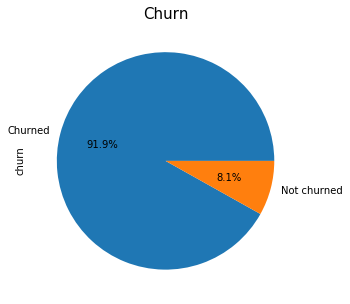

In [182]:
plt.figure(figsize = [5,5])
plt.title('Churn', fontsize = 15)
churn_filtered.churn.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Churned', 'Not churned'])
plt.show()

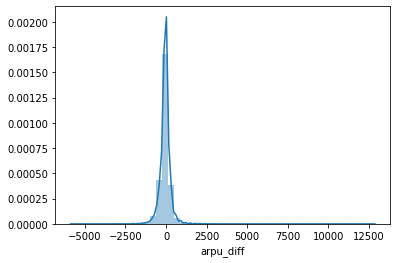

In [183]:
sns.distplot(churn_filtered.arpu_diff)

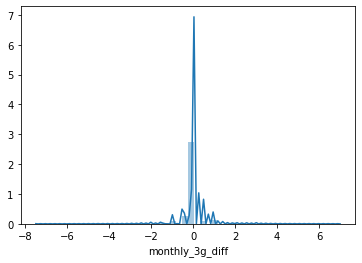

In [211]:
sns.distplot(churn_filtered.monthly_3g_diff)

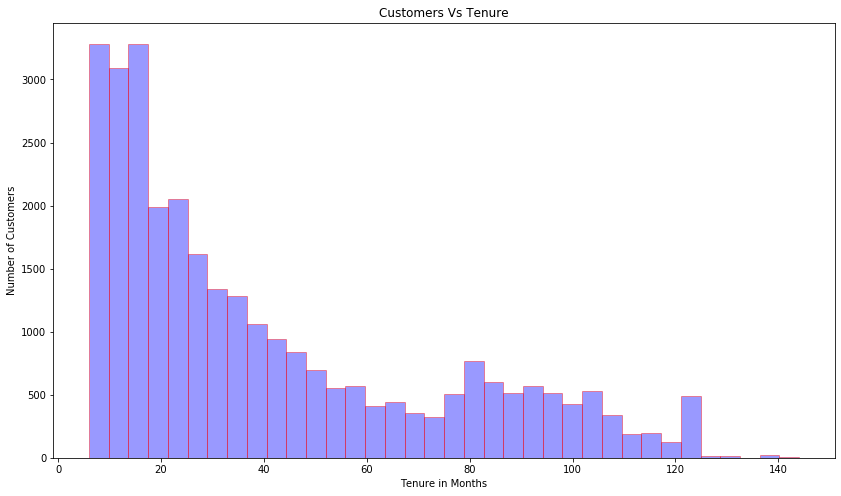

In [204]:
tenure_data = churn_filtered.copy()
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator's network
tenure_data['tenure'] = tenure_data['aon'] / 30
sns.distplot(tenure_data['tenure'], hist = True, kde = False,
             bins = int(180/5), color = 'blue', 
             hist_kws = {'edgecolor':'red'},
             kde_kws = {'linewidth': 4})
plt.ylabel('Number of Customers')
plt.xlabel('Tenure in Months')
plt.title('Customers Vs Tenure')
plt.show()

#### As observed, customers tend to leave the operator service after sometime. The customers are not loyal to the service, maybe because of the schemes or service or network.

### Bi-variate

In [142]:
#function to observer behavior difference in 6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn_filtered
    plt.subplot(2,3,1)
    plt.title('Month 6', fontsize = 15)
    sns.boxplot(data = df, y = attribute + "_6", x = "churn", hue = "churn",
                showfliers = False, palette= ("plasma"))
    plt.subplot(2,3,2)
    plt.title('Month 7', fontsize = 15)
    sns.boxplot(data = df, y = attribute + "_7", x = "churn", hue = "churn",
                showfliers = False, palette = ("plasma"))
    plt.subplot(2,3,3)
    plt.title('Month 8', fontsize = 15)
    sns.boxplot(data = df, y = attribute + "_8", x = "churn", hue = "churn",
                showfliers = False, palette = ("plasma"))
    plt.show()

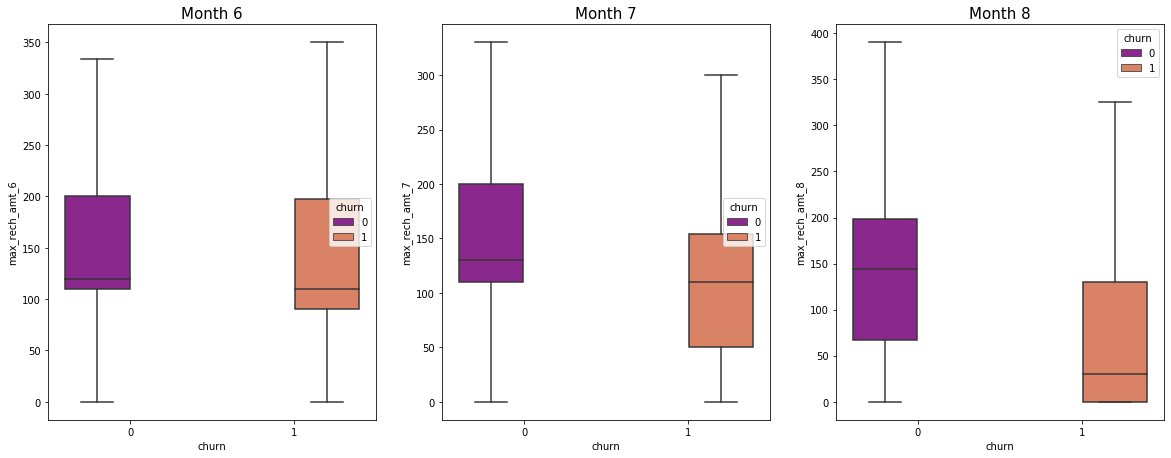

In [143]:
# Recharge amount vs churn
plot_box_chart('max_rech_amt')

#### As observed, the value for max_rech_amt has dropped drastically in the 8th month for customers who have churned. For customers who have not churned, the max_rech_amt remains somewhat constant

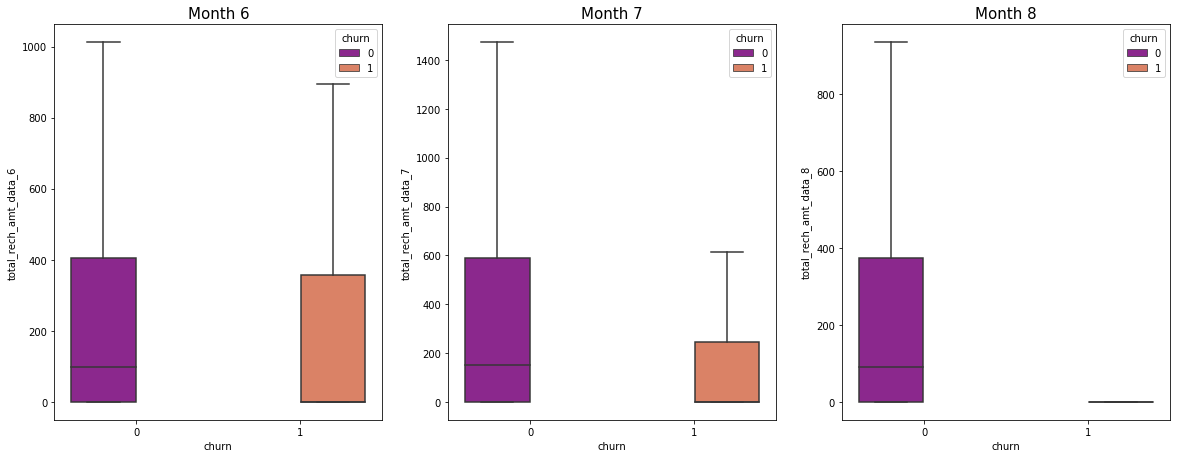

In [145]:
plot_box_chart('total_rech_amt_data')

#### As observed, there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

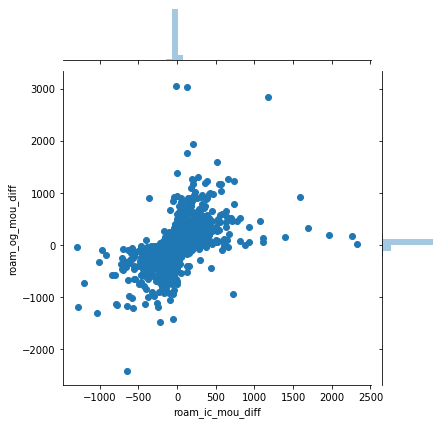

In [202]:
sns.jointplot(x = churn_filtered.roam_ic_mou_diff, y = churn_filtered.roam_og_mou_diff)

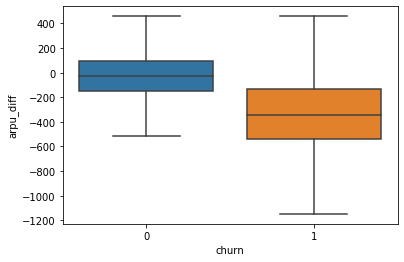

In [203]:
sns.boxplot(x = 'churn', y = 'arpu_diff', data = churn_filtered, showfliers = False)

### Multi-variate

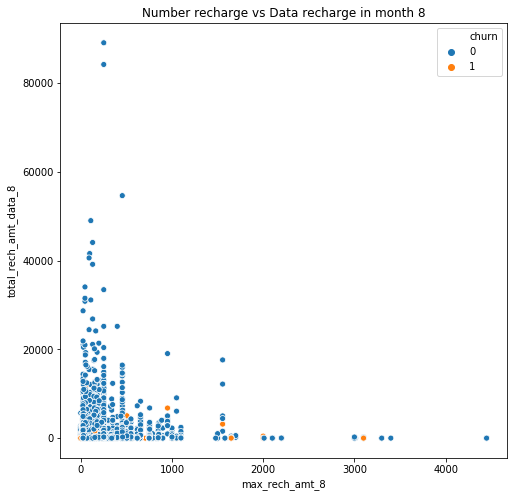

In [194]:
plt.figure(figsize = [8, 8])
plt.title('Number recharge vs Data recharge in month 8')
sns.scatterplot(x = 'max_rech_amt_8', y = 'total_rech_amt_data_8', hue = 'churn', data = churn_filtered)
plt.show()

#### As observed, there are some high-value customers who had high max_rech_amt in months na dstill churned. One possible reason for it can be a better scheme from competetive services. Also, all the churned customers have low total_rech_amt_data

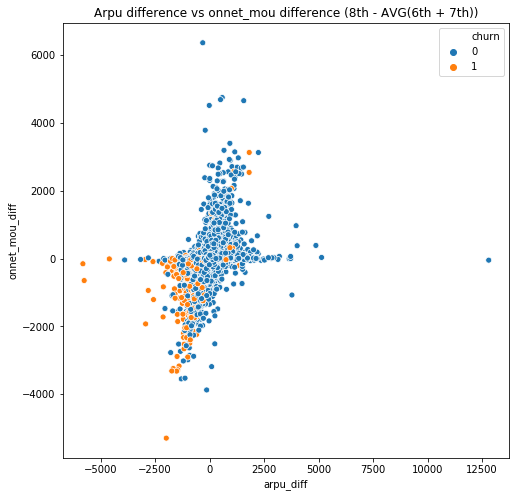

In [210]:
plt.figure(figsize = [8, 8])
plt.title('Arpu difference vs onnet_mou difference (8th - AVG(6th + 7th))')
sns.scatterplot(x = 'arpu_diff', y = 'onnet_mou_diff', hue = 'churn', data = churn_filtered)
plt.show()

## Treating outliers using IQR

In [209]:
for col in num_cols:
    Q1 = churn_filtered[col].quantile(0.25)
    Q3 = churn_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    if(len(churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] < (Q1 - 1.5 * IQR)]) > 0 
       or len(churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] > (Q3 + 1.5 * IQR)]) > 0):
        print('Found outliers in column: ' + col)
        churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] < (Q1 - 1.5 * IQR)] = Q1 - 1.5 * IQR
        churn_filtered[num_cols[0]][churn_filtered[num_cols[0]] > (Q3 + 1.5 * IQR)] = Q3 + 1.5 * IQR
        print('Capped outliers in column "' + col + '" using IQR method' )

Found outliers in column: arpu_6
Capped outliers in column "arpu_6" using IQR method
Found outliers in column: onnet_mou_6
Capped outliers in column "onnet_mou_6" using IQR method
Found outliers in column: roam_ic_mou_6
Capped outliers in column "roam_ic_mou_6" using IQR method


# Modelling

### Dummification of categorical columns

In [144]:
churn_filtered.shape

(29953, 65)

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVariables = pd.get_dummies(churn_filtered[cat_cols], drop_first=True)

In [54]:
# Adding the results to the master dataframe
churn_filtered = pd.concat([churn_filtered, dummyVariables], axis=1)

In [55]:
churn_filtered.drop(cat_cols, axis=1, inplace=True)

In [56]:
churn_filtered.shape

(29979, 82)

### Train-test split

In [57]:
#Splitting the dataframe to 70% train and 30% test
df_train, df_test = train_test_split(churn_filtered, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(20985, 82)
(8994, 82)


In [58]:
y_train = df_train['churn']
X_train = df_train.drop('churn', axis = 1)

In [59]:
y_test = df_test['churn']
X_test = df_test.drop('churn', axis = 1)

## Scaling

In [60]:
# scaling 
scaler = MinMaxScaler()
num_cols.remove('churn')
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_train.head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_3g_6,aon,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
26370,0.0,0.005000,0.025804,0.066376,0.022437,0.005228,0.000001,0.019735,0.005543,0.013600,0.058303,0.031592,0.003057,0.000001,0.003823,0.004108,0.006139,0.004416,0.0,0.0,8.547412e-07,0.022898,0.007195,9.439350e-07,0.004475,0.002016,0.000029,0.750935,0.982001,0.001968,0.000635,0.000000,0.000000,0.033343,0.029220,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.216856,0.000000,0.347464,0.461503,0.340259,0.356953,0.439324,0.433535,0.570695,0.538613,0.397965,0.451432,0.455906,0.493644,0.467832,0.434736,0.326255,0.306416,0.470091,0.743405,0.337778,0.292538,0.541717,0.461538,0.464646,0.517241,0.344262,0,0,0,0,0,0,0,0,0,0,0,0
10382,0.0,0.027382,0.014119,0.051206,0.022437,0.005228,0.014871,0.019031,0.007036,0.007025,0.049628,0.030903,0.000000,0.019079,0.000000,0.000000,0.000000,0.000000,0.0,0.0,9.902149e-03,0.014730,0.008723,4.582856e-03,0.000359,0.000000,0.968507,0.750935,0.982001,0.000000,0.000000,0.029316,0.062843,0.076387,0.011238,0.017972,0.000900,0.0,0.2,0.2,0.0,0.0,0.197778,0.001520,0.297625,0.452190,0.246192,0.362797,0.440900,0.423139,0.578245,0.539722,0.398925,0.444585,0.459183,0.485955,0.466677,0.433496,0.326965,0.307011,0.470583,0.688249,0.290427,0.281560,0.508634,0.538462,0.464646,0.448276,0.344262,1,0,1,0,1,0,0,1,0,1,0,1
5067,0.0,0.032489,0.067422,0.051206,0.022437,0.005228,0.022682,0.084373,0.046845,0.007025,0.049628,0.030903,0.000000,0.019079,0.022977,0.014718,0.004851,0.000000,0.0,0.0,1.114526e-02,0.031409,0.030344,3.370740e-03,0.000173,0.000355,0.968507,0.750935,0.982001,0.017402,0.000000,0.045603,0.062344,0.075781,0.064958,0.002921,0.025893,0.5,0.2,0.2,0.0,0.0,0.663125,0.001061,0.302424,0.450652,0.231650,0.362797,0.440900,0.418475,0.552479,0.523786,0.398925,0.443774,0.457393,0.492861,0.466382,0.433379,0.328685,0.298231,0.470934,0.721823,0.331624,0.297281,0.554105,0.384615,0.464646,0.586207,0.344262,1,0,1,0,1,0,0,1,0,1,0,1
16438,0.0,0.049559,0.038111,0.051206,0.022437,0.005228,0.029005,0.046210,0.003001,0.007025,0.049845,0.030903,0.000000,0.019079,0.001671,0.001588,0.006611,0.000000,0.0,0.0,2.793895e-02,0.032555,0.000000,3.485745e-03,0.001650,0.000000,0.968507,0.750935,0.982001,0.000000,0.000000,0.016287,0.031920,0.038800,0.032367,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.284714,0.000000,0.336619,0.446405,0.348687,0.362797,0.440900,0.417463,0.556829,0.540256,0.398925,0.434386,0.443675,0.493669,0.465284,0.438097,0.326965,0.307148,0.470583,0.719424,0.327692,0.292538,0.541717,0.461538,0.464646,0.517241,0.344262,0,0,0,0,0,0,0,0,0,0,0,0
10086,0.0,0.021485,0.168691,0.051580,0.022437,0.005228,0.010641,0.001867,0.000000,0.007025,0.049628,0.030903,0.000000,0.019079,0.000000,0.000000,0.000000,0.000000,0.0,0.0,7.770882e-03,0.006287,0.000000,4.210459e-03,0.004531,0.000000,0.972552,0.750935,0.982001,0.00000

## Logistic Regression Model using RFE

In [61]:
# using sklearn 
logreg = LogisticRegression(class_weight='balanced')

In [62]:
X_train.describe()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,ic_others_6,total_rech_num_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_3g_6,aon,sep_vbc_3g,arpu_diff,onnet_mou_diff,offnet_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,loc_og_t2t_mou_diff,loc_og_t2m_mou_diff,loc_og_t2f_mou_diff,std_og_t2f_mou_diff,loc_ic_t2t_mou_diff,loc_ic_t2m_mou_diff,loc_ic_t2f_mou_diff,std_ic_t2t_mou_diff,std_ic_t2m_mou_diff,std_ic_t2f_mou_diff,isd_ic_mou_diff,ic_others_diff,total_rech_num_diff,max_rech_amt_diff,vol_2g_mb_diff,vol_3g_mb_diff,monthly_2g_diff,sachet_2g_diff,monthly_3g_diff,sachet_3g_diff,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
count,20985.0,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000,20985.000000
mean,0.0,0.062493,0.062588,0.057768,0.025963,0.009273,0.024697,0.038471,0.010187,0.011743,0.052776,0.035776,0.005646,0.019299,0.005852,0.006000,0.007257,0.006982,0.000175,0.000377,0.017593,0.034415,0.009418,0.006268,0.007068,0.002746,0.959676,0.743881,0.952854,0.002880,0.000931,0.039544,0.042890,0.053490,0.036721,0.007650,0.005672,0.031403,0.026562,0.023340,0.015782,0.004982,0.260783,0.004020,0.309240,0.451181,0.243818,0.362464,0.440116,0.423739,0.576523,0.541414,0.398505,0.445976,0.457556,0.492645,0.466211,0.433255,0.326829,0.307175,0.470496,0.698926,0.323101,0.291718,0.541852,0.459614,0.465868,0.517013,0.344217,0.370836,0.010293,0.381272,0.010150,0.385895,0.009149,0.040267,0.340863,0.044603,0.346819,0.064999,0.330045
std,0.0,0.064910,0.069142,0.028718,0.019874,0.019965,0.037844,0.052993,0.030933,0.020683,0.016319,0.020588,0.034155,0.009106,0.018345,0.018888,0.021551,0.023603,0.008212,0.012355,0.025584,0.047856,0.028139,0.013800,0.021738,0.018553,0.096974,0.073551,0.167912,0.017303,0.011753,0.031411,0.044453,0.055816,0.039705,0.026899,0.019734,0.093972,0.078063,0.072655,0.053126,0.030646,0.234783,0.028996,0.018450,0.027821,0.021147,0.018831,0.017703,0.016477,0.026236,0.013144,0.014166,0.015877,0.025209,0.015440,0.010164,0.014879,0.009862,0.010832,0.011784,0.033232,0.024017,0.019364,0.025121,0.048021,0.028715,0.030613,0.014257,0.483040,0.100934,0.485711,0.100238,0.486817,0.095216,0.196589,0.474011,0.206436,0.475969,0.246530,0.470240
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [63]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
## list columns that rfe predicted as useful
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 67),
 ('onnet_mou_6', False, 37),
 ('offnet_mou_6', False, 57),
 ('roam_ic_mou_6', False, 17),
 ('roam_ic_mou_7', False, 4),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', False, 11),
 ('loc_og_t2c_mou_6', False, 63),
 ('loc_og_t2c_mou_7', False, 21),
 ('loc_og_t2c_mou_8', False, 32),
 ('std_og_t2f_mou_6', False, 34),
 ('isd_og_mou_6', False, 48),
 ('spl_og_mou_6', False, 26),
 ('spl_og_mou_7', False, 47),
 ('spl_og_mou_8', False, 12),
 ('og_others_6', False, 44),
 ('og_others_7', False, 43),
 ('og_others_8', False, 31),
 ('loc_ic_t2t_mou_6', True, 1),
 ('loc_ic_t2m_mou_6', False, 6),
 ('loc_ic_t2f_mou_6', False, 7),
 ('std_ic_t2t_mou_6', False, 28),
 ('std_ic_t2m_mou_6', False, 25),
 ('std_ic_t2f_mou_6', False, 23),
 ('spl_ic_mou_6', False, 27),
 ('spl_ic_mou_7', False, 33),
 ('spl_ic_mou_8', False, 9),
 ('isd_ic_mou_6', False, 42),
 ('ic_others_6', False, 39),
 ('total_rech_num_6', True, 1),
 ('max

In [65]:
# get supported columns from RFE
col = X_train.columns[rfe.support_]

### Assessing the model with StatsModels

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4182.3
Date:                Wed, 26 Aug 2020   Deviance:                       8364.5
Time:                        18:51:37   Pearson chi2:                 4.44e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 114.3941      4.049     28.254      0.000     106.459     122.329
roam_og_mou_8          14.6716      1.077     13.620      0.000      12.560      16.783
loc_og_t2t_mou_6      -80.0567      5.471    -14.632      0.000     -90.781     -69.333
loc_og_t2m_mou_6       -9.3216      1.543     -6.041      0.000     -12.346      -6.297
loc_ic_t2t_mou_6      -30.8651      4.252     -7.258      0.000     -39.200     -22.530
total_rech_num_6      -10.5284      1.290     -8.164      0.000     -13.056      -8.001
max_rech_amt_8        -11.5268      1.352     -8.524      0.000     -14.177      -8.876
sep_vbc_3g            -42.0191      9.957     -4.220      0.000     -61.533     -22.505
arpu_diff             -22.9822      2.796     -8.219      0.000     -28.463     -17.502
onnet_mou_diff         -5.3377      1.180     -4.523      0.000      -7.651      -3.025
offnet_mou_diff        -7.2340      1.657     -4.366      0.000     -10.481      -3.987
loc_og_t2t_mou_diff  -149.6502      9.894    -15.126      0.000    -169.041    -130.259
loc_og_t2m_mou_diff    -7.3936      2.882     -2.565      0.010     -13.043      -1.744
loc_ic_t2t_mou_diff   -55.2077      6.453     -8.556      0.000     -67.855     -42.561
loc_ic_t2m_mou_diff    -6.9821      1.327     -5.263      0.000      -9.582      -4.382
total_rech_num_diff   -11.4499      1.333     -8.587      0.000     -14.063      -8.837
=======================================================================================
"""

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_og_t2t_mou_diff,837.92
11,loc_og_t2m_mou_diff,758.35
12,loc_ic_t2t_mou_diff,733.11
14,total_rech_num_diff,726.61
7,arpu_diff,615.89
8,onnet_mou_diff,437.35
13,loc_ic_t2m_mou_diff,374.38
9,offnet_mou_diff,228.10
4,total_rech_num_6,3.18
5,max_rech_amt_8,2.14


In [68]:
### drop loc_og_t2m_mou_diff since this has p value greater than expected
col = col.drop('loc_og_t2m_mou_diff', 1)

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4185.8
Date:                Wed, 26 Aug 2020   Deviance:                       8371.6
Time:                        18:51:38   Pearson chi2:                 5.34e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 111.9785      3.904     28.685      0.000     104.327     119.630
roam_og_mou_8          15.0772      1.067     14.126      0.000      12.985      17.169
loc_og_t2t_mou_6      -81.6078      5.470    -14.918      0.000     -92.329     -70.886
loc_og_t2m_mou_6       -6.1157      0.839     -7.293      0.000      -7.759      -4.472
loc_ic_t2t_mou_6      -30.7022      4.248     -7.227      0.000     -39.029     -22.376
total_rech_num_6      -10.5984      1.291     -8.209      0.000     -13.129      -8.068
max_rech_amt_8        -11.8891      1.352     -8.793      0.000     -14.539      -9.239
sep_vbc_3g            -42.1362      9.988     -4.219      0.000     -61.712     -22.560
arpu_diff             -23.4857      2.794     -8.405      0.000     -28.963     -18.009
onnet_mou_diff         -5.4701      1.185     -4.616      0.000      -7.793      -3.148
offnet_mou_diff        -7.9441      1.640     -4.843      0.000     -11.159      -4.729
loc_og_t2t_mou_diff  -152.4710      9.855    -15.471      0.000    -171.787    -133.155
loc_ic_t2t_mou_diff   -54.8238      6.465     -8.481      0.000     -67.494     -42.153
loc_ic_t2m_mou_diff    -7.7832      1.293     -6.018      0.000     -10.318      -5.248
total_rech_num_diff   -11.6017      1.336     -8.684      0.000     -14.220      -8.983
=======================================================================================
"""

In [70]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,loc_og_t2t_mou_diff,800.02
13,total_rech_num_diff,715.88
11,loc_ic_t2t_mou_diff,688.96
7,arpu_diff,613.07
8,onnet_mou_diff,436.61
12,loc_ic_t2m_mou_diff,326.39
9,offnet_mou_diff,213.57
4,total_rech_num_6,3.17
5,max_rech_amt_8,2.13
1,loc_og_t2t_mou_6,1.87


In [71]:
### drop loc_og_t2m_mou_diff since this has p value greater than expected
col = col.drop('loc_og_t2t_mou_diff', 1)

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4347.1
Date:                Wed, 26 Aug 2020   Deviance:                       8694.3
Time:                        18:51:38   Pearson chi2:                 3.29e+06
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  69.6180      2.715     25.645      0.000      64.297      74.939
roam_og_mou_8          16.9562      1.082     15.665      0.000      14.835      19.078
loc_og_t2t_mou_6       -4.0210      1.359     -2.959      0.003      -6.684      -1.358
loc_og_t2m_mou_6       -6.8200      0.830     -8.215      0.000      -8.447      -5.193
loc_ic_t2t_mou_6      -62.0796      4.468    -13.895      0.000     -70.836     -53.323
total_rech_num_6      -11.8255      1.273     -9.290      0.000     -14.320      -9.331
max_rech_amt_8        -16.9636      1.470    -11.538      0.000     -19.845     -14.082
sep_vbc_3g            -45.1790     10.423     -4.335      0.000     -65.607     -24.751
arpu_diff             -33.7288      2.704    -12.474      0.000     -39.028     -28.429
onnet_mou_diff         -5.6608      1.175     -4.818      0.000      -7.964      -3.358
offnet_mou_diff        -5.5548      1.624     -3.420      0.001      -8.738      -2.372
loc_ic_t2t_mou_diff   -98.2151      6.033    -16.281      0.000    -110.039     -86.391
loc_ic_t2m_mou_diff    -7.7774      1.269     -6.129      0.000     -10.264      -5.290
total_rech_num_diff   -12.8589      1.330     -9.670      0.000     -15.465     -10.252
=======================================================================================
"""

In [73]:
# Check VIf values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_rech_num_diff,705.01
7,arpu_diff,612.62
10,loc_ic_t2t_mou_diff,514.25
8,onnet_mou_diff,367.34
11,loc_ic_t2m_mou_diff,315.19
9,offnet_mou_diff,213.06
4,total_rech_num_6,3.13
5,max_rech_amt_8,2.13
3,loc_ic_t2t_mou_6,1.72
2,loc_og_t2m_mou_6,1.71


## PCA

In [74]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

Looking at the explained variance ratio for each component

In [75]:
pca.explained_variance_ratio_

array([5.88732114e-01, 9.85007299e-02, 7.67859548e-02, 7.19867553e-02,
       3.26233477e-02, 2.90927732e-02, 1.83003173e-02, 1.73604712e-02,
       1.42566349e-02, 6.32610478e-03, 5.43542706e-03, 4.50855072e-03,
       3.75400810e-03, 3.31046391e-03, 2.71499895e-03, 2.67746109e-03,
       2.56367452e-03, 1.95376960e-03, 1.63575756e-03, 1.60904727e-03,
       1.34225239e-03, 9.23336423e-04, 7.74787672e-04, 7.42456805e-04,
       7.13264811e-04, 6.72902531e-04, 6.59912365e-04, 6.22906505e-04,
       5.89337685e-04, 5.80239501e-04, 5.51221908e-04, 5.07721123e-04,
       4.66317788e-04, 4.34889462e-04, 3.87726881e-04, 3.73706720e-04,
       3.71075136e-04, 3.48659055e-04, 3.44642845e-04, 3.31968982e-04,
       2.84403945e-04, 2.77895049e-04, 2.40402378e-04, 2.16912849e-04,
       1.95633100e-04, 1.93092392e-04, 1.83194976e-04, 1.79216061e-04,
       1.78438662e-04, 1.42956201e-04, 1.34048673e-04, 1.30207123e-04,
       1.25288025e-04, 1.23384125e-04, 1.16213951e-04, 1.13408338e-04,
      

#### Making a scree plot for the explained variance

In [76]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.58873211, 0.68723284, 0.7640188 , 0.83600555, 0.8686289 ,
       0.89772168, 0.91602199, 0.93338246, 0.9476391 , 0.9539652 ,
       0.95940063, 0.96390918, 0.96766319, 0.97097365, 0.97368865,
       0.97636611, 0.97892979, 0.98088356, 0.98251931, 0.98412836,
       0.98547061, 0.98639395, 0.98716874, 0.9879112 , 0.98862446,
       0.98929736, 0.98995728, 0.99058018, 0.99116952, 0.99174976,
       0.99230098, 0.9928087 , 0.99327502, 0.99370991, 0.99409764,
       0.99447134, 0.99484242, 0.99519108, 0.99553572, 0.99586769,
       0.99615209, 0.99642999, 0.99667039, 0.9968873 , 0.99708294,
       0.99727603, 0.99745922, 0.99763844, 0.99781688, 0.99795983,
       0.99809388, 0.99822409, 0.99834938, 0.99847276, 0.99858898,
       0.99870238, 0.99881499, 0.99892064, 0.99902494, 0.99912402,
       0.99921735, 0.99930832, 0.99939213, 0.99947303, 0.99954574,
       0.99961419, 0.99967216, 0.99972534, 0.9997739 , 0.99981963,
       0.99986196, 0.99990307, 0.99993876, 0.99997416, 1.     

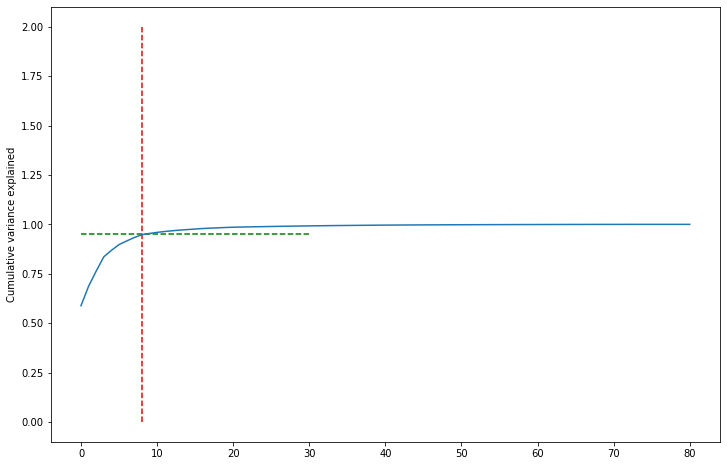

In [77]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=8, ymax=2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [78]:
pca_final = PCA(0.99, svd_solver='full')

In [79]:
df_train_pca = pca_final.fit_transform(X_train)

In [80]:
df_train_pca.shape

(20985, 28)

In [81]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [82]:
corrmat.shape

(28, 28)

Plotting the heatmap of the corr matrix

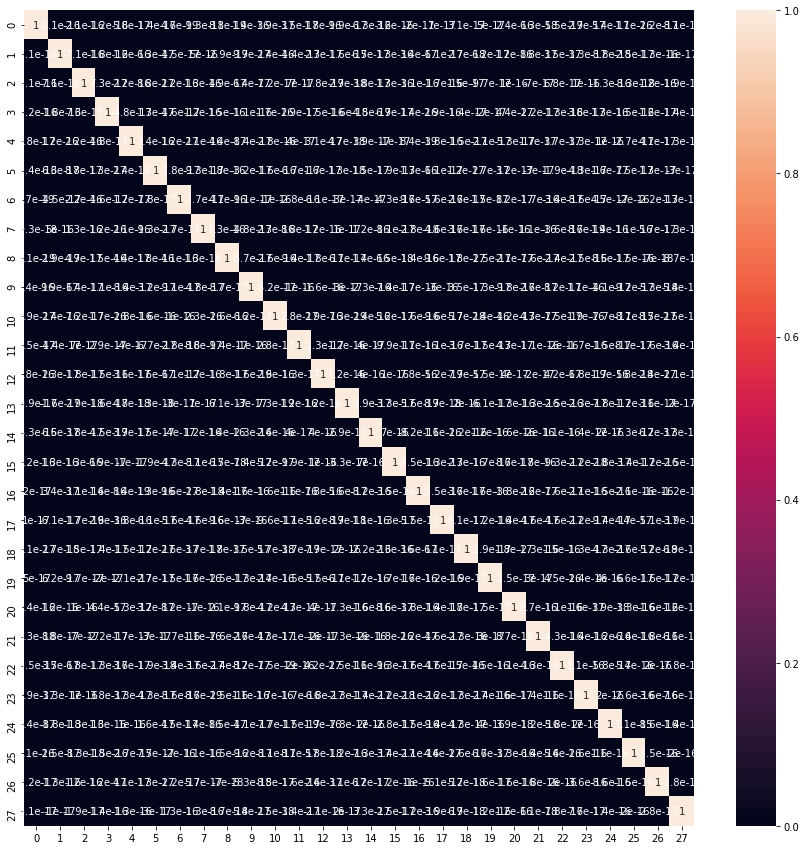

In [83]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [84]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 28)

Looking at the explained variance ratio for each component

## Hyperparameter tuning - PCA and Logistic Regression

In [85]:
# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression()

# hyperparameter space
params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 100], 'penalty': ['l1', 'l2']}

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [86]:
# fit model
model.fit(df_train_pca, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    5.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [87]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023825,0.002663,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
1,0.239025,0.029744,0.007491,0.001921,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.285303,0.261111,0.311526,0.256983,0.229381,0.268861,0.027750,9
2,0.024940,0.005295,0.000000,0.000000,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.349097,0.016104,0.006167,0.000413,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",0.299712,0.269444,0.320872,0.259777,0.239691,0.277899,0.028922,8
4,0.024070,0.001667,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,0.409135,0.026403,0.007342,0.002098,1,l2,"{'C': 1, 'penalty': 'l2'}",0.305476,0.277778,0.336449,0.265363,0.242268,0.285467,0.032646,7
6,0.022811,0.000778,0.000000,0.000000,2,l1,"{'C': 2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
7,0.549296,0.031541,0.005810,0.000410,2,l2,"{'C': 2, 'penalty': 'l2'}",0.317003,0.288889,0.342679,0.270950,0.244845,0.292873,0.034252,6
8,0.024704,0.002892,0.000000,0.000000,3,l1,"{'C': 3, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
9,0.598645,0.042614,0.005828,0.000741,3,l2,"{'C': 3, 'penalty': 'l2'}",0.319885,0.294444,0.348910,0.273743,0.247423,0.296881,0.035281,5


In [88]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)
print(model.best_estimator_)

Best AUC:  0.306848284499256
Best hyperparameters:  {'C': 100, 'penalty': 'l2'}
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [89]:
# predict churn on test data
y_pred = model.predict(df_test_pca)

In [90]:
# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[8118,   61],
       [ 552,  263]], dtype=int64)

In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.32


In [93]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity: \t", round(specificity, 2))

Specificity: 	 0.99


In [94]:
# check area under curve
y_pred_prob = model.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.87


## Decision Tree Classifier with PCA and hyperparameter tuning

In [95]:
dsTree = DecisionTreeClassifier()
dsTreeParams = {
            'max_depth': [10,20,25,28,30,35, 40],
            'min_samples_leaf': [5,10,20,50,100,200]}

dsFolds = KFold(n_splits=5, random_state=42)

dsTreeModel = GridSearchCV(estimator=dsTree, cv=dsFolds, param_grid = dsTreeParams, scoring='recall', verbose=1, n_jobs=-1)

In [96]:
# fit model
dsTreeModel.fit(df_train_pca, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   32.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_

In [97]:
# print best hyperparameters
print("Best AUC: ", dsTreeModel.best_score_)
print("Best hyperparameters: ", dsTreeModel.best_params_)

Best AUC:  0.38221468766073347
Best hyperparameters:  {'max_depth': 25, 'min_samples_leaf': 5}


In [98]:
# predict churn on test data
dsTreePred = dsTreeModel.predict(df_test_pca)

In [99]:
# create onfusion matrix
dsTreeconfusion = confusion_matrix(y_test, dsTreePred)
dsTreeconfusion

array([[7802,  377],
       [ 500,  315]], dtype=int64)

In [100]:
TP_ds = dsTreeconfusion[1,1] # true positive 
TN_ds = dsTreeconfusion[0,0] # true negatives
FP_ds = dsTreeconfusion[0,1] # false positives
FN_ds = dsTreeconfusion[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
sensitivity_ds = TP_ds / float(TP_ds+FN_ds)
print("Sensitivity: \t", round(sensitivity_ds, 2))

Sensitivity: 	 0.39


In [102]:
# Let us calculate specificity
specificity_ds = TN_ds / float(TN_ds+FP_ds)
print("Specificity: \t", round(specificity_ds, 2))

Specificity: 	 0.95


In [103]:
# check area under curve
y_pred_prob_ds = dsTreeModel.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_ds),2))

AUC:    	 0.73


## Random Forest

In [104]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params = {
#             "criterion": ['gini', 'entropy'], 
#             "max_features": ['auto', 0.4],   
            'max_depth': [10,20,25,28,30,35, 40],
            'min_samples_leaf': [5,10,20,50,100,200],
            'n_estimators': [10, 25, 50, 100]}

# create 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
rf_model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [105]:
# fit model
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  7.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_

In [106]:
# print best hyperparameters
print("Best AUC: ", rf_model.best_score_)
print("Best hyperparameters: ", rf_model.best_params_)

Best AUC:  0.828950215789957
Best hyperparameters:  {'max_depth': 30, 'min_samples_leaf': 200, 'n_estimators': 100}


In [107]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

In [108]:
# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[7027, 1152],
       [ 141,  674]], dtype=int64)

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [110]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.83


In [111]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity: \t", round(specificity, 2))

Specificity: 	 0.86


In [112]:
# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.92


### Choosing features

In [113]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

9


In [114]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [115]:
# OOB score
rf_model.oob_score_

0.937240886347391

In [116]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [117]:
# create onfusion matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[8096,   83],
       [ 476,  339]], dtype=int64)

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity, 2))

Sensitivity: 	 0.42


In [120]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
print("Specificity: \t", round(specificity, 2))

Specificity: 	 0.99


In [121]:
# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:    	 0.92


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## Feature Importance

In [122]:
# predictors
features = churn_filtered.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)

In [123]:
feature_importance

,variables,importance_percentage
0,roam_og_mou_8,10.047709
1,arpu_diff,8.673045
2,max_rech_amt_8,6.421393
3,roam_ic_mou_diff,4.980330
4,onnet_mou_diff,4.401428
5,roam_og_mou_diff,3.652372
6,loc_ic_t2t_mou_diff,3.354606
7,loc_ic_t2m_mou_diff,3.012897
8,max_rech_amt_diff,2.829072
9,total_rech_num_diff,2.709419


## Random forest with PCA and hyperparameter tuning

In [124]:
#random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest_pca = RandomForestClassifier(class_weight='balanced', n_jobs = -1)

# hyperparameter space
params_pca = {
            'max_depth': [10,20,25,28,30,35, 40],
            'min_samples_leaf': [5,10,20,50,100,200],
            'n_estimators': [10, 25, 50, 100]
}

# create 5 folds
folds_pca = KFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rf_model_pca = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='recall', n_jobs=-1, verbose=1)

In [125]:
# fit model
rf_model_pca.fit(df_train_pca, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:  9.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_

In [126]:
y_pred_rf_pca = rf_model_pca.predict(df_test_pca)

In [127]:
# create onfusion matrix
confusion_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)
confusion_rf_pca 

array([[6719, 1460],
       [ 194,  621]], dtype=int64)

In [128]:
TP = confusion_rf_pca[1,1] # true positive 
TN = confusion_rf_pca[0,0] # true negatives
FP = confusion_rf_pca[0,1] # false positives
FN = confusion_rf_pca[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
sensitivity_rf_pca = TP / float(TP+FN)
print("Sensitivity: \t", round(sensitivity_rf_pca, 2))

Sensitivity: 	 0.76


In [130]:
# Let us calculate specificity
specificity_rf_pca = TN / float(TN+FP)
print("Specificity: \t", round(specificity_rf_pca, 2))

Specificity: 	 0.82


In [131]:
# check area under curve
y_pred_prob_rf_pca = rf_model_pca.predict_proba(df_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob_rf_pca),2))

AUC:    	 0.87
